<a href="https://colab.research.google.com/github/Githubprj1/Machine_Learning_Linear_Regression/blob/main/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('student_scores.csv') #read dataset

In [3]:
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
dataset.shape

(25, 2)

In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here the studend learnt hours and there score.
no outliers here - there is no major difference in 25%,50%,75%

Another method to find outliers - box plot
here q3(75%) = 7.4 , q1(25%) = 2.7
iqr = 7.4 - 2.7 = 4.7
low value = q1-(1.5*4.7)=2.7-7.05= -4.35
high value =q3+(1.5*4.7)=7.4+7.05= 14.45
Therefore ther is no value less than -4.35 and greater than 14.45
so,NO OUTLIERS

In [ ]:
dataset.isnull().sum()   # checking the missing value count

Hours     0
Scores    0
dtype: int64

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.shape

(25, 2)

In [ ]:
dataset.dtypes  # check datatype -- here it is in right format

Hours     float64
Scores      int64
dtype: object

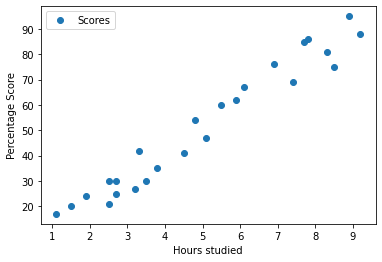

In [ ]:
# EDA----> EXploratory data analysis
dataset.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

1. is there a relationship ? YES
2. is there a linear relationship(st.line)?YES

In [ ]:
# other method to find linear relationship
dataset.corr()  # here the correlation value is 0.9 -- there is strong linear relationship

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
# Preparing the data
X =  dataset.loc[:,['Hours']].values  # Hours is FEATURE
y =  dataset.loc[:,'Scores'].values  #SCORE is target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [ ]:
y_test

array([47, 20, 62, 42, 27, 54, 25, 30])

In [ ]:
X_train.shape,X_test.shape

((17, 1), (8, 1))

In [ ]:
# Scaling -- good practice to do
# Normalization or standarization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() #inital
# scaler.fit(X_train)  #fit
# X_train = scaler.transform(X_train) #transform
# X_test = scaler.transform(X_test)

In [ ]:
# another method of scaling - MinMax scaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler() #inital
# scaler.fit(X_train)  #fit
# X_train = scaler.transform(X_train) #transform
# X_test = scaler.transform(X_test)

In [ ]:
#                MODELING - LINEAR REGRESSION
from sklearn.linear_model import LinearRegression #import
regressor = LinearRegression() # initalise
regressor.fit(X_train,y_train) #fit - where Loss , learning JAR happen  , Gradient Descend happens and we get m,c values(i.e:y=mx+c)

LinearRegression()

In [ ]:
print(regressor.intercept_)  # gives C value

1.7208083832335603


In [ ]:
print(regressor.coef_)  # slope -- m
# predicted score (y) = 9.87(m)*Hours(X)+1.72(C) --> linear y=mx+c

[9.87275449]


In [ ]:
regressor.predict([[5]])  # predicting when the student studies for 5 hours a day
# if do scaling and then modeling then it be scaled data so when we predict we need to scale
#regressor.predict([scaler.transform(np.array([4]).reshape(-1,1)))
# y =9.87*5+1.72 => 51.07 score

array([51.08458084])

In [ ]:
regressor.predict([[9]])  # predicting when the student studies for 9 hours a day

array([90.5755988])

In [ ]:
y_pred = regressor.predict(X_test)
y_pred  # predicted value for feature test data X_test

array([52.07185629, 16.52994012, 59.97005988, 34.3008982 , 33.31362275,
       49.11002994, 28.37724551, 26.40269461])

In [ ]:
df = pd.DataFrame({'Actual': y_test , 'Predicted': y_pred})
df
# Here Actual Feature test data from dataset is shown with Predicted value

,Actual,Predicted
0,47,52.071856
1,20,16.529940
2,62,59.970060
3,42,34.300898
4,27,33.313623
5,54,49.110030
6,25,28.377246
7,30,26.402695


In [ ]:
# PERILS OF EXTRAPOLATION
# when a person studies for 13 hours then my prediction should work accordingly
#here it gives score is 130 which is not correct before a maximum score in test a person can take is 100. This is called extrapolation
# and also in dataset max hours read is 9 hours so ml will not work becos we train with only dataset
regressor.predict([[13]])

array([130.06661677])

In [ ]:
#   EVALUATION METRIC - R2 SCORE ----> THIS IS THE EVALUATION METRIC FOR ANY MODEL TO SAY
                        # WHETHER THE MODEL IS GOOD OR BAD
from sklearn import metrics
print('R2 SCORE:', metrics.r2_score(y_test,y_pred))

R2 SCORE: 0.8821316105563578


Here, the r2 score is 0.8 --> good model

In [ ]:
 # Pertol consumtion dataset
df1 = pd.read_csv('petrol_consumption.csv')

In [ ]:
df1.shape

(48, 5)

In [ ]:
df1.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
df1.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
df1.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
df1.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
df1.shape

(48, 5)

In [ ]:
for col in df1.columns:   # to see column name
  print(col)

Petrol_tax
Average_income
Paved_Highways
Population_Driver_licence(%)
Petrol_Consumption


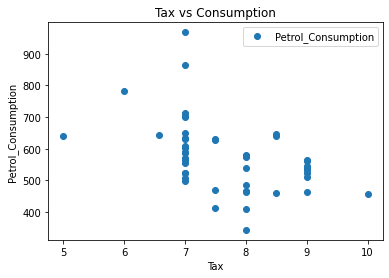

In [ ]:
#EDA
df1.plot(x='Petrol_tax',y='Petrol_Consumption',style='o')
plt.title('Tax vs Consumption')
plt.xlabel('Tax')
plt.ylabel('Petrol_Consumption')
plt.show()

In [ ]:
df1[['Petrol_tax','Petrol_Consumption']].corr()  # CORR relation is above -0.2 there is strong negative linear relatonship

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


In [ ]:
 #  EDA
 df1.groupby('Petrol_tax')['Petrol_Consumption'].mean() # ALL COUNTRY WITH SAME PETROL TAX IS GROUPED
#  df1.plot(x='Petrol_tax',y='Petrol_Consumption',style='o')
#  plt.title('Tax vs Consumption')
#  plt.xlabel('Tax')
#  plt.ylabel('Petrol_Consumption')
#  plt.show()

Petrol_tax
5.00     640.000000
6.00     782.000000
6.58     644.000000
7.00     631.736842
7.50     536.000000
8.00     502.000000
8.50     582.666667
9.00     530.875000
10.00    457.000000
Name: Petrol_Consumption, dtype: float64

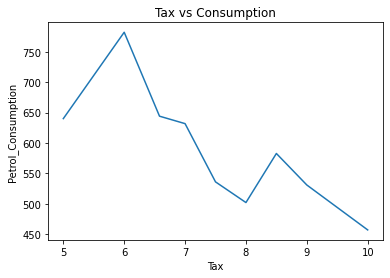

In [ ]:
df1.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
#df1.plot(x='Petrol_tax',y='Petrol_Consumption',style='o')
plt.title('Tax vs Consumption')
plt.xlabel('Tax')
plt.ylabel('Petrol_Consumption')
plt.show()

1.There is relationship between the feature(Tax) and target (consumption)

In [ ]:
df1[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


There is negative strong linear relationhip becos it less than -0.2. so linear relationship is there no transformation needed

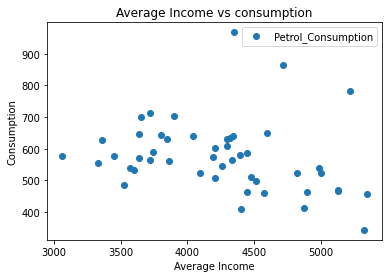

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [ ]:
df1.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df1[['Average_income','Petrol_Consumption']].corr()

1.There is relationship between feature and target
2.There is low negative strong linear relationship - corr=-0.24
3.no transformation is needed

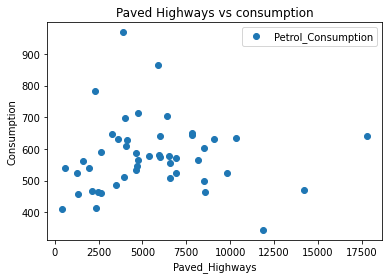

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.019042
Petrol_Consumption,0.019042,1.000000


In [ ]:
df1.plot(x='Paved_Highways', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()
df1[['Paved_Highways','Petrol_Consumption']].corr()

1.There is relationship
2.There is no linear realationship
3.Transformation is needed

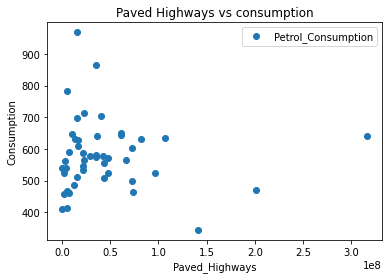

,transformed,Petrol_Consumption
transformed,1.000000,-0.046976
Petrol_Consumption,-0.046976,1.000000


In [ ]:
# TRANSFORMATION OF PAVED_WAY IS BELOW TRYING FEATURE WITH X2,SQAUREROOT(X),LOG(X),EXPONENTIAL(X)
import numpy as np
df1['transformed'] = np.square(df1['Paved_Highways'])  # SQUARE OF X  (giving column name as transformed)
df1.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()
df1[['transformed','Petrol_Consumption']].corr()

NO linear relationship

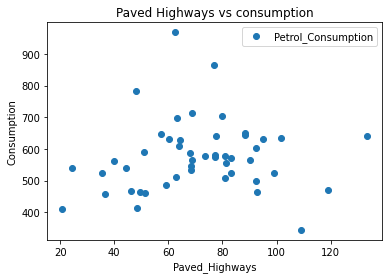

,transformed,Petrol_Consumption
transformed,1.000000,0.086698
Petrol_Consumption,0.086698,1.000000


In [ ]:
df1['transformed'] = np.power(df1['Paved_Highways'],0.5)  # SQUARE root OF X
df1.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()
df1[['transformed','Petrol_Consumption']].corr()

No Linear relationship

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


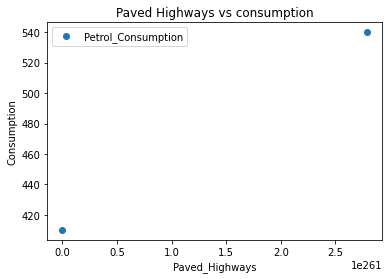

,transformed,Petrol_Consumption
transformed,NaN,0.0
Petrol_Consumption,0.0,1.0


In [ ]:
df1['transformed'] = np.exp(df1['Paved_Highways'])  # exponential OF X
df1.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()
df1[['transformed','Petrol_Consumption']].corr()

No linear relationship

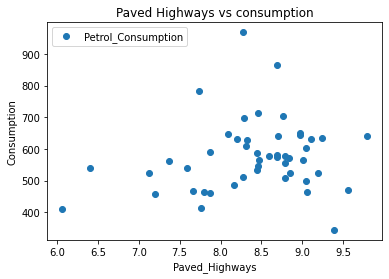

,transformed,Petrol_Consumption
transformed,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


In [ ]:
df1['transformed'] = np.log(df1['Paved_Highways'])  # log OF X
df1.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()
df1[['transformed','Petrol_Consumption']].corr()

NO linear realtionship

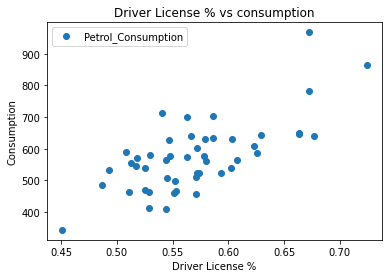

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [ ]:
df1.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
df1[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

1.There is reltionship between feature and target
2.there is strong linear relationship
3.Transformation is NOT needed

In [ ]:
X = df1[['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)']].values #array of features , no relationshipw with Paved way features so nt including
y = df1['Petrol_Consumption'].values #array of targets

In [ ]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler ## standrard scaling
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

In [ ]:
# LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
regressor.intercept_  # C VALUE

583.9736842105262

In [ ]:

coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
# petrol_consumption = -29 *scaled_petrol_tax + -38 * scaled_avg_income +  80 * scaled_pop_driver + 583
#  Y = m1X1+m2X2+m3X3+C

,Coefficient
Petrol_tax,-29.564915
Average_income,-38.034850
Population_Driver_licence(%),80.695238


Here most important feature ---> absolute highest coefficient
Here Population_driver_licence% --> biggest impact on pertol consumption
 followed by ---> average_income
 followed by ---> petrol tax

 SUPPOSE IF INDIAN GOVERNMENT ASKS WHICH POLICY WILL BE MOST EFFECTIVE TO CONTROL THE PETROL CONSUMPTION?

 OPTIONS: A.INCREASE TAX ON PETROL B.MAKE EVERYONE RICHER BY 15L EACH DEPOSIT
 3.INCREASE THE DRIVING LICENCE THE AGE LIMIT from 18 to 21 4.PAVE MORE ROADS

 ANS:- option 3 - because due to our above prediction population_driver_licence is most effective to reduce petrol consumption